In [ ]:
# Libraries
import statsmodels.formula.api as sm
import pandas as pd       #data processing
import numpy as np        #linear algebra
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
#from haversine import haversine
#import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
#Importing the Dataset
df=pd.read_csv('/content/nyc_taxi_trip_duration.csv')

In [ ]:
np.sum(pd.isnull(df)) #checking for null values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
289800,id1601570,1,2016-05-24 08:40:40,2016-05-24 09:15:00,1,-73.983734,40.696152,-73.9,NaN,NaN,NaN


In [ ]:
df=df.dropna().reset_index(drop=True) #deleting the NaN row and Reset index after drop

In [ ]:
np.sum(pd.isnull(df)) #Rechecking for Null Values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# Encode categorical variables
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N':0,'Y':1})

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848.0


In [ ]:
df.nunique()  #Checking Unique Values in Columns

id                    289800
vendor_id                  2
pickup_datetime       286606
dropoff_datetime      286630
passenger_count            8
pickup_longitude       15935
pickup_latitude        33213
dropoff_longitude      21274
dropoff_latitude       42203
store_and_fwd_flag         2
trip_duration           5130
dtype: int64

In [ ]:
df.describe() #Statistical summary of the dataset.

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,289800.000000,289800.000000,289800.000000,289800.000000,289800.000000,289800.000000,289800.000000,2.898000e+05
mean,1.536798,1.665873,-73.973401,40.751017,-73.973412,40.751808,0.005217,9.510290e+02
std,0.498645,1.315431,0.041285,0.035185,0.040390,0.032818,0.072043,4.721703e+03
min,1.000000,0.000000,-79.569733,40.298828,-80.355431,40.293289,0.000000,1.000000e+00
25%,1.000000,1.000000,-73.991821,40.737438,-73.991333,40.735928,0.000000,3.970000e+02
50%,2.000000,1.000000,-73.981766,40.754137,-73.979790,40.754459,0.000000,6.630000e+02
75%,2.000000,2.000000,-73.967346,40.768353,-73.963165,40.769756,0.000000,1.075000e+03
max,2.000000,7.000000,-70.511902,51.881084,-70.511902,42.458942,1.000000,1.939736e+06


NEW FEATURE CREATION

DAY,HOUR, WEEKDAY, MONTH

Pandas To Datetime (.to_datetime()) will convert your string representation of a date to an actual date format. 

AGE CALCULATION
EG today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year
df

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

df['pickup_day']=df['pickup_datetime'].dt.day_name() #Day by Name
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()#Day by Name
df['pickup_day_no']=df['pickup_datetime'].dt.weekday #Days in Number
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday#Days in Number
df['pickup_hour']=df['pickup_datetime'].dt.hour #24 Hours Format
df['dropoff_hour']=df['dropoff_datetime'].dt.hour#24 Hours Format
df['pickup_month']=df['pickup_datetime'].dt.month #Month in Numbers
df['dropoff_month']=df['dropoff_datetime'].dt.month#Month in Numbers


DIVIDING DAY INTO MORNING, AFTERNOON, EVENING, LATE NIGHT

In [ ]:
def time_of_day(x): #defining a function
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day) #Creating Coulum pickup_timeofday
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day) #Creating Coulum dropoff_timeofday

DISTANCE USING GEOPY, GREAT CIRCLE

OTHERS FORMULA THAT CAN BE USED
The great circle distance.
Haversine formula.
Vincenty formula.

In [ ]:
from geopy.distance import great_circle # Importing library for calculating distance from geographical coordinates.

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long): #Defining a function to take coordinates as inputs and return us distance.
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km
#Creating the feature ‘distance’.
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

SPEED

In [ ]:
#Calculate Speed in km/h for further insights
df['speed'] = (df.distance/(df.trip_duration/3600))

DATA STRUCTURE

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,...,0,0,16,16,2,2,Evening,Evening,1.199074,10.791669
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,...,4,4,23,23,3,3,Late night,Late night,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,...,6,6,17,18,2,2,Evening,Evening,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,...,1,1,9,10,1,1,Morning,Morning,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,...,2,2,6,6,2,2,Morning,Morning,4.328540,18.375877


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289800 entries, 0 to 289799
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  289800 non-null  object        
 1   vendor_id           289800 non-null  int64         
 2   pickup_datetime     289800 non-null  datetime64[ns]
 3   dropoff_datetime    289800 non-null  datetime64[ns]
 4   passenger_count     289800 non-null  int64         
 5   pickup_longitude    289800 non-null  float64       
 6   pickup_latitude     289800 non-null  float64       
 7   dropoff_longitude   289800 non-null  float64       
 8   dropoff_latitude    289800 non-null  float64       
 9   store_and_fwd_flag  289800 non-null  int64         
 10  trip_duration       289800 non-null  float64       
 11  pickup_day          289800 non-null  object        
 12  dropoff_day         289800 non-null  object        
 13  pickup_day_no       289800 no

OUTLIERS

Trip Duration Outliers

In [ ]:
#outlier Observed

#Sorting For Inspection
df['trip_duration'].sort_values(ascending=False)

21813     1939736.0
259437      86391.0
119185      86387.0
177225      86378.0
90557       86369.0
            ...    
146590          2.0
119181          1.0
102646          1.0
70318           1.0
95823           1.0
Name: trip_duration, Length: 289800, dtype: float64

In [ ]:
#Dropping Rows having Trip Duration Outliers ( 1939736 and 1)
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)
df.drop(df[df['trip_duration'] == 1].index, inplace = True)

Passenger count outlier

In [ ]:
df.passenger_count.value_counts()

1    205184
2     41874
5     15502
3     11866
6      9645
4      5712
0        11
7         1
Name: passenger_count, dtype: int64

In [ ]:
#Removing Trips With No Passengers (32) and Single Trips With 7 and 9 Passengers
df.drop(df[df['passenger_count'] == 0].index, inplace = True)
df.drop(df[df['passenger_count'] == 7].index, inplace = True)
df.drop(df[df['passenger_count'] == 9].index, inplace = True)

SPEED OUTLIERS

In [ ]:
df.speed.describe()

count    289783.000000
mean         14.430010
std          13.927277
min           0.000000
25%           9.111737
50%          12.788910
75%          17.851555
max        5640.501953
Name: speed, dtype: float64

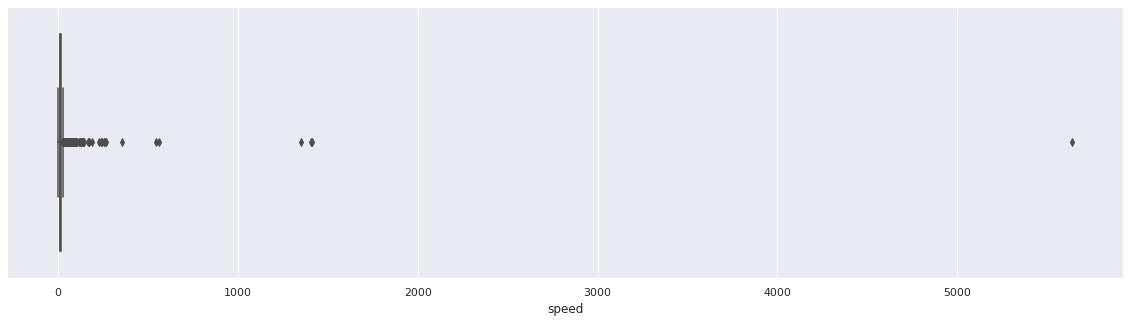

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

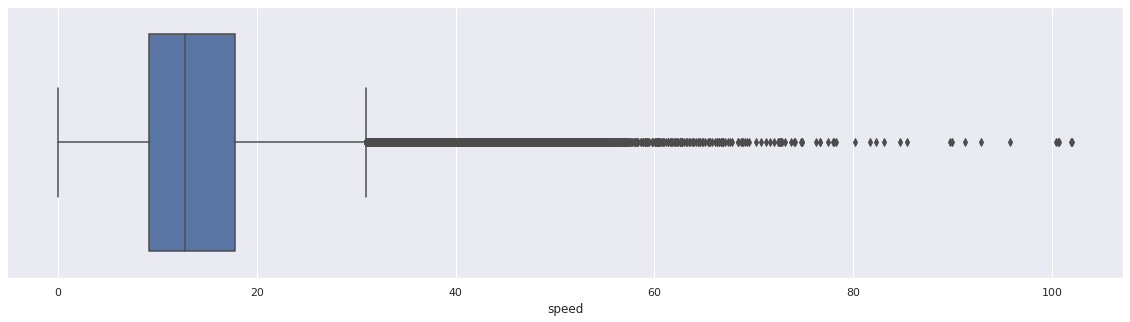

In [ ]:
#Box Plot Analysis of Speed Less than 104 Km/hr
bds1 = df[df.speed <= 104]
plt.figure(figsize = (20,5))
sns.boxplot(bds1.speed)
plt.show()

In [ ]:
df.drop(df[df['speed'] > 120].index, inplace = True)


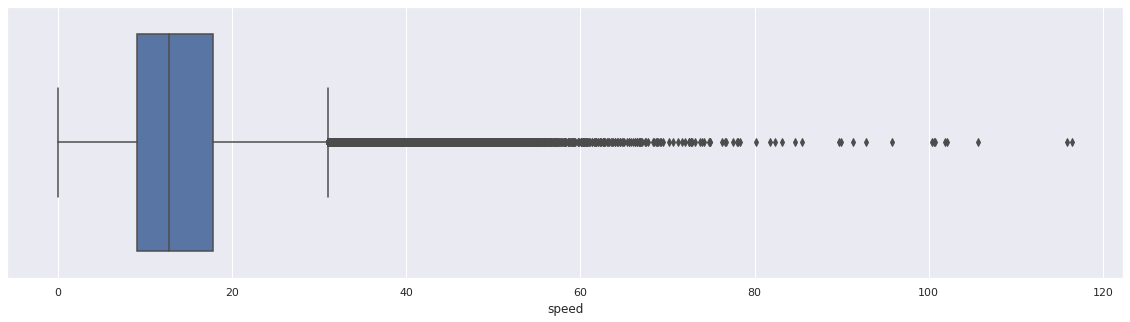

In [ ]:
#Box Plot Analysis of Speed Less than 104 Km/hr
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

Many trips were done at a speed of over 200 km/h.

Mostly trips are done at a speed range of 10-20 km/h with an average speed of around 14 km/h.

MAKING A COPY OF DATASET

In [ ]:

df1 = df.copy(deep=True)

In [ ]:
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,...,0,0,16,16,2,2,Evening,Evening,1.199074,10.791669
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,...,4,4,23,23,3,3,Late night,Late night,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,...,6,6,17,18,2,2,Evening,Evening,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,...,1,1,9,10,1,1,Morning,Morning,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,...,2,2,6,6,2,2,Morning,Morning,4.328540,18.375877


In [ ]:
df1.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'speed'],
      dtype='object')

DELETING COLUMNS NOT REQUIRED

In [ ]:
df1.drop(['id','pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_datetime', 'dropoff_datetime','speed', 'pickup_day', 'dropoff_day', 'pickup_timeofday', 'dropoff_timeofday'], axis = 1, inplace = True)

In [ ]:
df1.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
0,2,1,0,400.0,0,0,16,16,2,2,1.199074
1,1,2,0,1100.0,4,4,23,23,3,3,4.129117
2,2,2,0,1635.0,6,6,17,18,2,2,7.250763
3,2,6,0,1141.0,1,1,9,10,1,1,2.361101
4,1,1,0,848.0,2,2,6,6,2,2,4.328540


In [ ]:
df1.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'distance'],
      dtype='object')

STASTICAL SUMMARY

In [ ]:
df1.describe()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
count,289758.000000,289758.000000,289758.000000,289758.000000,289758.000000,289758.000000,289758.000000,289758.000000,289758.000000,289758.000000,289758.000000
mean,1.536782,1.665952,0.005215,944.433365,3.049051,3.052941,13.614226,13.609667,3.519810,3.520175,3.443688
std,0.498646,1.315407,0.072024,3053.685205,1.956127,1.958456,6.396921,6.480371,1.680688,1.680850,3.970781
min,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,397.000000,1.000000,1.000000,9.000000,9.000000,2.000000,2.000000,1.231935
50%,2.000000,1.000000,0.000000,663.000000,3.000000,3.000000,14.000000,14.000000,4.000000,4.000000,2.092570
75%,2.000000,2.000000,0.000000,1075.000000,5.000000,5.000000,19.000000,19.000000,5.000000,5.000000,3.871847
max,2.000000,6.000000,1.000000,86391.000000,6.000000,6.000000,23.000000,23.000000,6.000000,7.000000,116.496589


Use corr() function to find the correlation among the columns in the Dataframe using the ‘Pearson’ method. 

In [ ]:
### EXploratory Data Analysis
## Correlation
df1.corr(method='kendall')

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
vendor_id,1.000000,0.229422,-0.077939,0.008156,0.000883,0.000928,0.008593,0.008748,-0.004278,-0.004270,0.004902
passenger_count,0.229422,1.000000,-0.015491,0.020584,0.035196,0.035251,0.021152,0.020533,0.002714,0.002699,0.013368
store_and_fwd_flag,-0.077939,-0.015491,1.000000,0.015836,-0.003978,-0.003758,0.002685,0.003319,-0.001518,-0.001530,0.016256
trip_duration,0.008156,0.020584,0.015836,1.000000,-0.021157,-0.020085,0.020725,0.022635,0.037059,0.037192,0.606788
pickup_day_no,0.000883,0.035196,-0.003978,-0.021157,1.000000,0.992737,-0.040801,-0.044019,-0.011320,-0.011304,0.018392
dropoff_day_no,0.000928,0.035251,-0.003758,-0.020085,0.992737,1.000000,-0.038125,-0.046385,-0.010959,-0.010911,0.019180
pickup_hour,0.008593,0.021152,0.002685,0.020725,-0.040801,-0.038125,1.000000,0.943844,-0.000117,0.000081,0.005239
dropoff_hour,0.008748,0.020533,0.003319,0.022635,-0.044019,-0.046385,0.943844,1.000000,-0.000209,-0.000405,0.002242
pickup_month,-0.004278,0.002714,-0.001518,0.037059,-0.011320,-0.010959,-0.000117,-0.000209,1.000000,0.999866,0.016067
dropoff_month,-0.004270,0.002699,-0.001530,0.037192,-0.011304,-0.010911,0.000081,-0.000405,0.999866,1.000000,0.016179


In [ ]:
df.corr(method ='pearson')

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,speed
vendor_id,1.000000,0.285948,0.015694,0.001093,0.004969,0.004014,-0.077939,0.034725,0.000979,0.001024,0.010063,0.010134,-0.004841,-0.004832,0.010395,0.002579
passenger_count,0.285948,1.000000,0.004495,-0.006530,0.000407,-0.006382,-0.021028,0.013866,0.026640,0.026756,0.010019,0.009521,0.000178,0.000154,0.010626,-0.005154
pickup_longitude,0.015694,0.004495,1.000000,-0.121290,0.295980,0.059168,0.021830,0.078530,-0.030397,-0.031665,0.021344,0.021062,0.006444,0.006562,0.502509,0.285086
pickup_latitude,0.001093,-0.006530,-0.121290,1.000000,0.073775,0.437961,-0.012198,-0.055968,-0.033435,-0.033629,0.012667,0.021374,-0.001477,-0.001558,-0.311856,-0.116140
dropoff_longitude,0.004969,0.000407,0.295980,0.073775,1.000000,0.142260,0.019285,0.050072,-0.001679,-0.001917,-0.040031,-0.042527,0.009636,0.009736,0.347471,0.269567
dropoff_latitude,0.004014,-0.006382,0.059168,0.437961,0.142260,1.000000,-0.013459,-0.043215,-0.024258,-0.025036,0.014900,0.019770,-0.001439,-0.001496,-0.160588,0.013199
store_and_fwd_flag,-0.077939,-0.021028,0.021830,-0.012198,0.019285,-0.013459,1.000000,0.003753,-0.004461,-0.004208,0.004291,0.004930,-0.001723,-0.001739,0.032635,0.010796
trip_duration,0.034725,0.013866,0.078530,-0.055968,0.050072,-0.043215,0.003753,1.000000,-0.003434,-0.005462,0.007024,0.004612,0.012756,0.013919,0.173329,-0.049747
pickup_day_no,0.000979,0.026640,-0.030397,-0.033435,-0.001679,-0.024258,-0.004461,-0.003434,1.000000,0.993839,-0.079334,-0.083043,-0.014947,-0.014924,0.006177,0.063916
dropoff_day_no,0.001024,0.026756,-0.031665,-0.033629,-0.001917,-0.025036,-0.004208,-0.005462,0.993839,1.000000,-0.075948,-0.087025,-0.014486,-0.014418,0.006606,0.063137


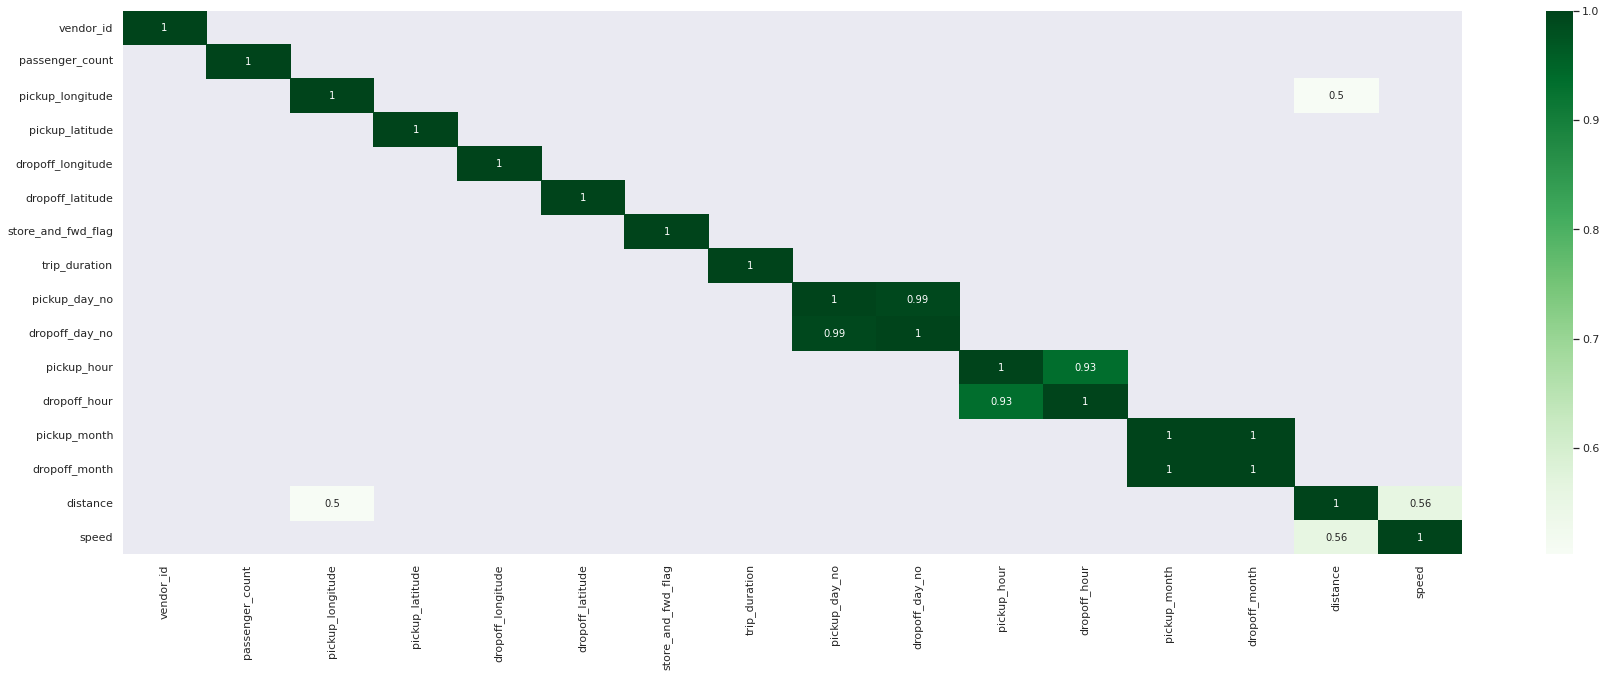

In [ ]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5))]
#filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) | (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Greens")
plt.show()

In [ ]:
#Take Time

#import seaborn as sns
#sns.pairplot(df)

Evaluation is always good in any field right! In the case of machine learning, it is best the practice. In this post, I will almost cover all the popular as well as common metrics used for machine learning.

Confusion Matrix
Classification Accuracy.
Logarithmic loss.
Area under Curve.
F1 score.
Mean Absolute Error.
Mean Squared Error.

In [ ]:
#IQR
#Calculating IQR for Trip Duration

Q1 = df1['trip_duration'].quantile(0.25)
Q3 = df1['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

678.0


In [ ]:
# Split
# Create matrix of features
X = df1[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag']] # double brackets! #pickup_weekday = weekday

# Create array of target variable 
y = df1['trip_duration']

# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

KeyError: ignored

Linear Regression

In [ ]:
#  Import model
from sklearn.linear_model import LinearRegression

#  Instantiate model object
lreg = LinearRegression()

# Fit to training data
lreg.fit(X_train,y_train)
print(lreg)

# Predict
y_pred_lreg = lreg.predict(X_test)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg)))

Decision Tree

In [ ]:
# Fit
# Import model
from sklearn.tree import DecisionTreeRegressor

# Instantiate model object
dtree = DecisionTreeRegressor()

# Fit to training data
dtree.fit(X_train,y_train)
print(dtree)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Score It
from sklearn import metrics
print('\nDecision Tree Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_dtree))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_dtree))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_dtree))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtree)))

Random Forest

In [ ]:
# Fit 
# Import model
from sklearn.ensemble import RandomForestRegressor 

# Instantiate model object
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1)

# Fit to training data
rforest = rforest.fit(X_train,y_train)
print(rforest)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('\nRandom Forest Regression Performance Metrics')
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))

KNN

Standardize the Variables

In [ ]:
df1.columns

In [ ]:
df1.info()

In [ ]:
df1["trip_duration"] = pd.to_numeric(df["trip_duration"], downcast="float")

df1["vendor_id"] = pd.to_numeric(df["vendor_id"], downcast="float")
df1["passenger_count"] = pd.to_numeric(df["passenger_count"], downcast="float")
df1["store_and_fwd_flagt"] = pd.to_numeric(df["store_and_fwd_flag"], downcast="float")

df1["trip_duration"] = pd.to_numeric(df["trip_duration"], downcast="float")
df1["pickup_day_no"] = pd.to_numeric(df["pickup_day_no"], downcast="float")
df1["pickup_hour"] = pd.to_numeric(df["pickup_hour"], downcast="float")
df1["dropoff_hour"] = pd.to_numeric(df["dropoff_hour"], downcast="float")

df1["pickup_month"] = pd.to_numeric(df["pickup_month"], downcast="float")
df1["dropoff_month"] = pd.to_numeric(df["dropoff_month"], downcast="float")

print(df1.dtypes)

In [ ]:
df1.columns

In [ ]:
df1.drop(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
         'dropoff_day_no', 'pickup_hour',
        'pickup_month',
       'store_and_fwd_flagt' ], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('trip_duration',axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df1.drop('trip_duration',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df1.columns[:-1])
df_feat.head()

In [ ]:

### EXploratory Data Analysis
## Correlation
df1.corr()

In [ ]:
import seaborn as sns
sns.pairplot(df1)

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Using KNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

PREDICTION AND EVALUATION

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [ ]:
'''error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))'''

In [ ]:
'''plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')'''

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
'''# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))'''

In [ ]:
# NOW WITH K=23
'''knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))'''

In [ ]:
#X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 42)

In [ ]:
#plt.style.use('seaborn')
#plt.figure(figsize = (10,10))
#plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
#plt.show()

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
#knn4 = KNeighborsClassifier(n_neighbors= 4)
#knn3 = KNeighborsClassifier(n_neighbors= 3)
#knn2 = KNeighborsClassifier(n_neighbors= 2)

In [ ]:
#knn4.fit(X_train, y_train)
#knn3.fit(X_train, y_train)
#knn2.fit(X_train, y_train)

#y_pred_4 = knn4.predict(X_test)
#y_pred_3 = knn3.predict(X_test)
#y_pred_2 = knn2.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score
#print("Accuracy with k=4", accuracy_score(y_test, y_pred_4)*100)
#print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
#print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)